Title: Grayscale Morphology in 1D
Author: Thomas Breuel
Institution: UniKL

In [128]:
from pylab import *
from scipy import stats
from scipy.ndimage import morphology,filters

# Construction of Input Signal and Template

Let's construct a detection problem. As usual, we have three parts:

- unrelated background
- a template to be detected
- some additive noise

Construction of background signal.



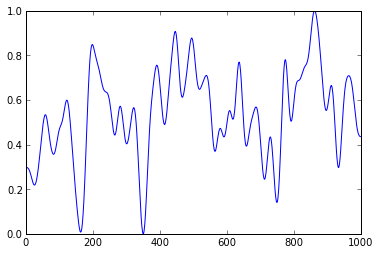

In [58]:
background = filters.gaussian_filter(randn(1000),10.0)
background -= amin(background)
background /= amax(background)
plot(background)

Construction of template.



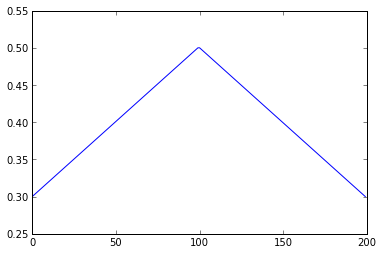

In [59]:
template = concatenate([linspace(0,0.2,100),linspace(0.2,0,100)])
template += 0.3
plot(template)

Construction of combined signal (template + background + noise).



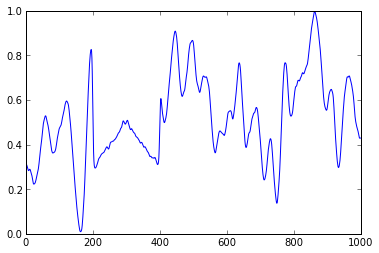

In [60]:
combined = background.copy()
combined[200:400] = template
combined += randn(len(combined))*0.02
combined = filters.gaussian_filter(combined,2.0)
plot(combined)

# Detection by Windows

The general idea behind detection is to...

- move a window the size of the template across the signal
- for each window position, determine how similar the window is to the template
- output the highest similarity (or lowest dissimilarity)



In [78]:
def window(a,r,i):
    return roll(a,r//2-i)[:r]

## Dissimilarity by 2-norm

A common way of determining similarity is by looking at the difference of the window $w_i$ from the template $t$ as vectors.

$$ d_i = ||w^{(i)}-t||^2 $$




301


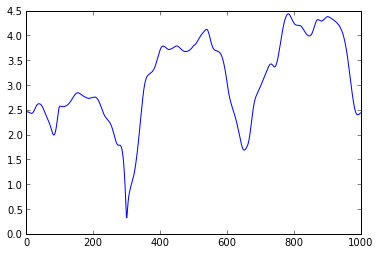

In [125]:
result = [sum((window(combined,r,i)-template)**2)**.5 for i in range(n)]
plot(result)
print argmin(result)

## Dissimilarity by 1-norm

We can also look at the sum of the absolute differences; it's a slightly different measure that's more robust to outliers.

$$ d_i = \sum_j |w^{(i)}_j-t_j| $$




300


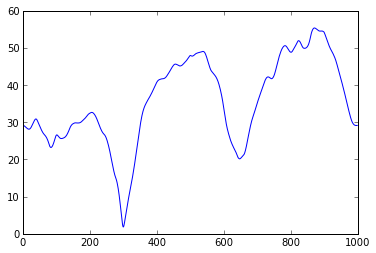

In [148]:
sad = [sum(abs(window(combined,r,i)-template)) for i in range(n)]
plot(sad)
print argmin(sad)

## Dissimilarity by Infinity Norm

The maximum difference is very sensitive to outliers, but still outputs the correct location.
This forms the basis of mathematical morphology.

$$ d_i = \max_j |w^{(i)}_j-t_j| $$




301


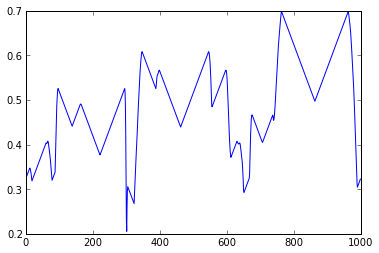

In [149]:
mad = [amax(abs(window(combined,r,i)-template)) for i in range(n)]
plot(mad)
print argmin(mad)

## Dissimilarity by Percentile

We can also use a percentile filter on the distribution of differences, which is a little more robust.

$$ d_i = \hbox{perc}_{90}\\{ |w^{(i)}_j-t_j| \\}$$




301


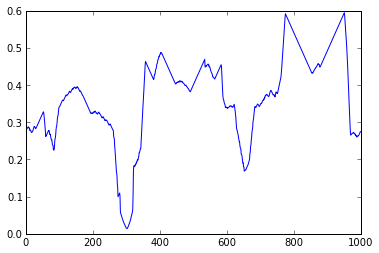

In [131]:
result = [stats.scoreatpercentile(abs(window(combined,r,i)-template),90) for i in range(n)]
plot(result)
print argmin(result)

## Templates with Constant Offsets

We might also be interested in matching regardless of a constant offset of the template.
We can achieve this by subtracting out, for example, the difference between the average of the window and template.



300


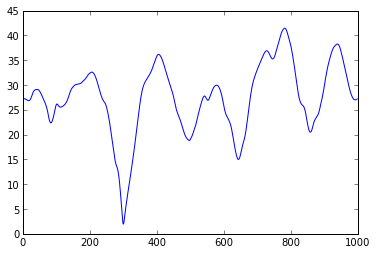

In [124]:
result = [sum(abs(window(combined,r,i)-template-(mean(window(combined,r,i))-mean(template)))) for i in range(n)]
plot(result)
print argmin(result)

# Mathematical Morphology

We used the maximum of the difference between the window and the signal as a quality of match measure:

$$ d_i = \max_j |w^{(i)}_j-t_j| $$

We can actually break this up into two pieces to get a closely related measure. First, we measure how far above the template the signal is:

$$ d_i = \max_j (w^{(i)}_j-t_j) $$

We can do the equivalent for the minimum:

$$ d_i = \min_j (w^{(i)}_j-t_j) $$

You can think of this as taking the template and moving it up/down as far as possible until it touches the graph of the signal somewhere.

163


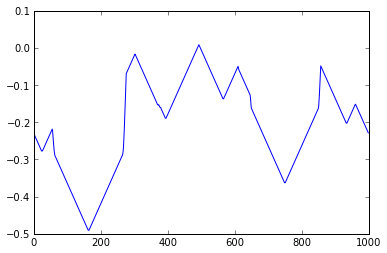

In [146]:
# upper difference
upper = array([amax(window(combined,r,i)-template) for i in range(n)])
plot(result)
print argmin(result)

163


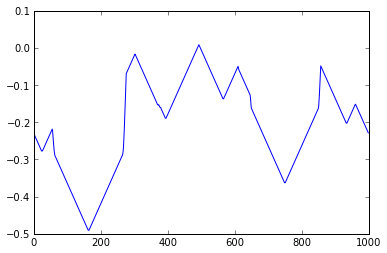

In [147]:
# lower difference
lower = array([amin(window(combined,r,i)-template) for i in range(n)])
plot(result)
print argmin(result)

We can now find a quality of match as a difference between the upper and lower differences.

Note that this is not exactly the same as the maximum of the differences over the window, but it also serves to localize the template.



301


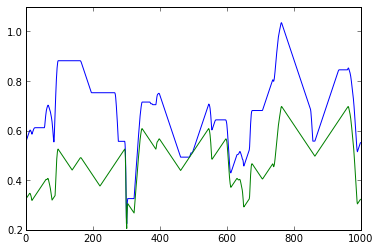

In [150]:
diff = abs(upper)+abs(lower)
plot(diff)
plot(mad)
print argmin(diff)

If the template is offset (in value) relative to the signal, then the upper and lower matches are also going to be offset the same way, so we can match signals by looking at the difference between the upper and lower matches.


301


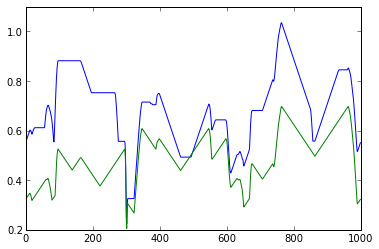

In [151]:
diff = upper-lower
plot(diff)
plot(mad)
print argmin(diff)

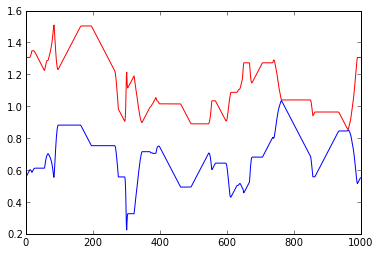

In [157]:
# matching with offset template
upper = array([amax(window(combined,r,i)-(template+0.7)) for i in range(n)])
lower = array([amin(window(combined,r,i)-(template+0.7)) for i in range(n)])
plot(abs(upper)+abs(lower),color="red")
plot(upper-lower,color="blue")